In [1]:
pip install pandas numpy scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np 
from scipy.io import arff 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor

In [4]:
pip install liac-arff

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import arff  # liac-arff
import pandas as pd

# Path to your dataset
dataset_path = r"D:\Year 2 Sem 1\depression_dataset.arff"

# Load ARFF file with liac-arff
with open(dataset_path, 'r') as f:
    data = arff.load(f)

# Convert to DataFrame
df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])

# If there are bytes, decode them (optional, liac-arff usually handles strings)
for col in df.select_dtypes(['object']):
    df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

print("Original Shape:", df.shape)
print(df.head())


Original Shape: (27901, 18)
     id  Gender   Age           City Profession  Academic Pressure  \
0   2.0    Male  33.0  Visakhapatnam    Student                5.0   
1   8.0  Female  24.0      Bangalore    Student                2.0   
2  26.0    Male  31.0       Srinagar    Student                3.0   
3  30.0  Female  28.0       Varanasi    Student                3.0   
4  32.0  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours  

In [9]:
# Drop rows with missing values
df = df.dropna()

# Print the new shape
print("After dropping missing values:", df.shape)


After dropping missing values: (27898, 18)


In [12]:
# Select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Create a DataFrame with only numeric columns
df_numeric = df[num_cols]


In [15]:
iso = IsolationForest(contamination=0.05, random_state=42) 
iso_preds = iso.fit_predict(df_numeric) 
iso_outliers = iso_preds == -1

In [16]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05) 
lof_preds = lof.fit_predict(df_numeric) 
lof_outliers = lof_preds == -1

In [19]:
combined_outliers = iso_outliers | lof_outliers
print("Number of outliers detected:", combined_outliers.sum())

Number of outliers detected: 2728


In [21]:
df_cleaned = df[~combined_outliers] 
print("After removing outliers:", df_cleaned.shape)

After removing outliers: (25170, 18)


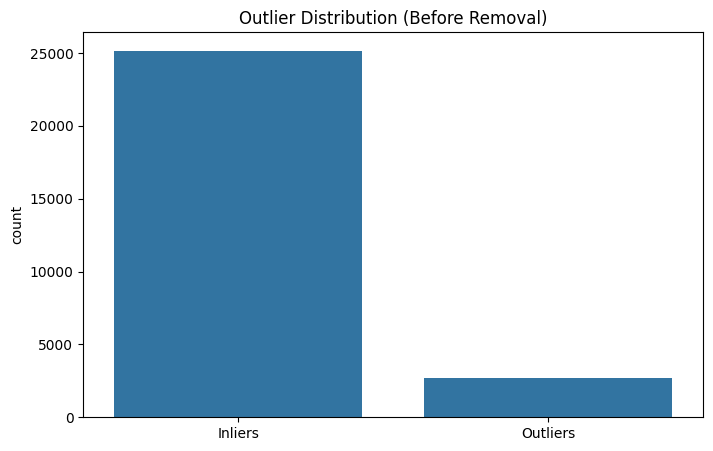

In [22]:
plt.figure(figsize=(8,5)) 
sns.countplot(x=combined_outliers) 
plt.title("Outlier Distribution (Before Removal)") 
plt.xticks([0,1], ["Inliers", "Outliers"]) 
plt.show()

In [23]:
output_path = r"D:\Year 2 Sem 1\depression_cleaned.csv" 
df_cleaned.to_csv(output_path, index=False) 
print(f"\nCleaned dataset saved at: {output_path}")


Cleaned dataset saved at: D:\Year 2 Sem 1\depression_cleaned.csv
